In [23]:
import pandas as pd

In [24]:
melbourne_data = pd.read_csv("melb_data.csv")

In [25]:
predictor_columns = ['Rooms', 'Distance', 'Landsize', 'BuildingArea', 'YearBuilt']

In [26]:
x = melbourne_data[predictor_columns]
y = melbourne_data.Price # our target - what we try to predict

It can be seen there exists both missing values and categorical data, lets use pipelines to effectively process this.

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor

In [28]:
# Bundles the pre-processing code and modelling code into a pipeline
pre_processing_pipeline = Pipeline(steps=[
    ('preprocessor', SimpleImputer()),
    ('model', RandomForestRegressor(n_estimators=50, random_state=18))
])

## Cross Validation
Divides data into sections e.g 1,2,3,4,5
The Validation is set to 1, and remaining sections are used to fit model.
Then it goes to 2, 3, 4, and 5. This allows for entire data and comprehensive coverage of data for our model.
If testing takes a few minutes or less use cross-validation. If the scores are similar to single validation testing, then use single validation for efficiency.

In [29]:
from sklearn.model_selection import cross_val_score

MAE_scores = -1 * cross_val_score(pre_processing_pipeline, x, y, cv=5, scoring="neg_mean_absolute_error")
print("Mean Absolute Error:\n", MAE_scores)
# to compare the models, we use negative mae score as the cross_val_score prioritises a high score, and by using neg MAE we are consistent

Mean Absolute Error:
 [301780.08638914 301967.96360967 285364.52999943 233533.01993951
 259461.85566795]


In [30]:
print(f"Average MAE Score {MAE_scores.mean()}")

Average MAE Score 276421.491121143


In [31]:
def get_score(n_estimators):
    fit_pipeline = Pipeline(steps=[
    ('preprocessor', SimpleImputer()),
    ('model', RandomForestRegressor(n_estimators=n_estimators, random_state=18))
    ])
    scores = -1 * cross_val_score(fit_pipeline, x, y, cv=3, scoring='neg_mean_absolute_error')
    return scores.mean()

294846.1550120387

In [32]:
results = {}
for n_estimator in range (50,450,50):
    results.update({n_estimator: get_score(n_estimator)})

## Using Matplotlib for plotting the n_estimators against the mean absolute value

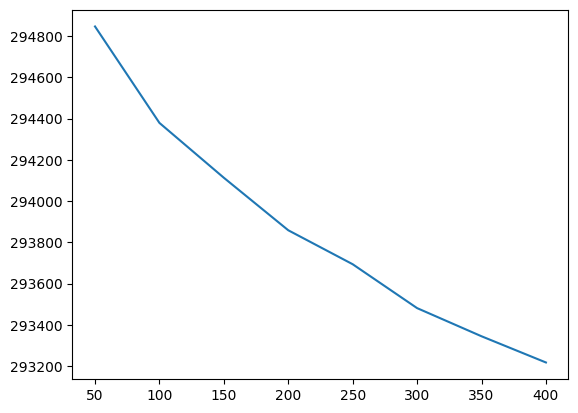

In [33]:
import matplotlib.pyplot as plt

plt.plot(list(results.keys()), list(results.values()))
plt.show()

## Using seaborn for plotting the n_estimators against the mean absolute value

<Axes: >

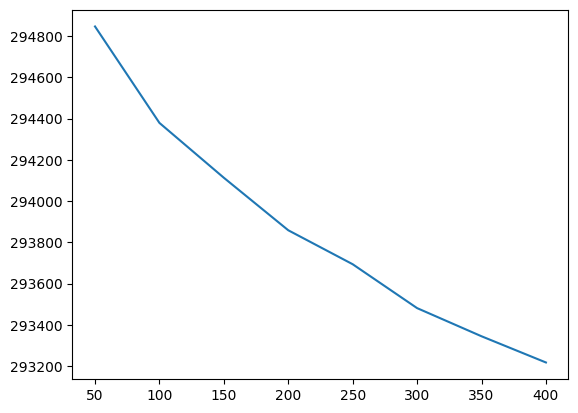

In [34]:
import seaborn
data = pd.DataFrame(list(results.keys()), list(results.values()))
seaborn.lineplot(data, x=list(results.keys()), y=list(results.values()))

This shows the best number of n_estimators should be 400 as it gives the least MAE.